In [1]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the example track
y, sr = librosa.load('SOS_16.wav')

In [4]:
y_h, y_p = librosa.effects.hpss(y)

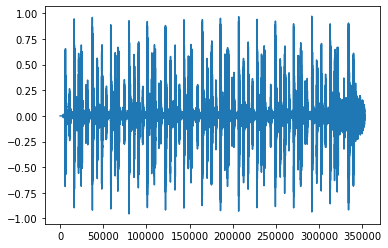

In [5]:
plt.plot(y)

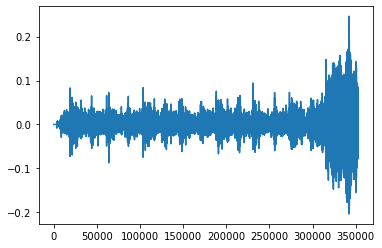

In [6]:
plt.plot(y_h)

In [7]:
IPython.display.Audio(data=y_p, rate=sr)

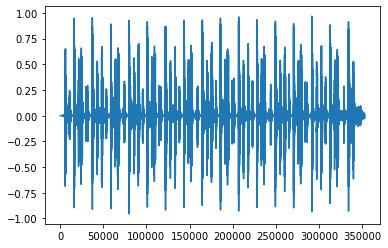

In [8]:
plt.plot(y_p)

In [9]:
#from scipy.io.wavfile import write
#write('미녀와야수_16_percussive.wav', 44100, y_p/np.max(abs(y_p))) #harmonic and percussive

<AxesSubplot:xlabel='Time', ylabel='Pitch class'>

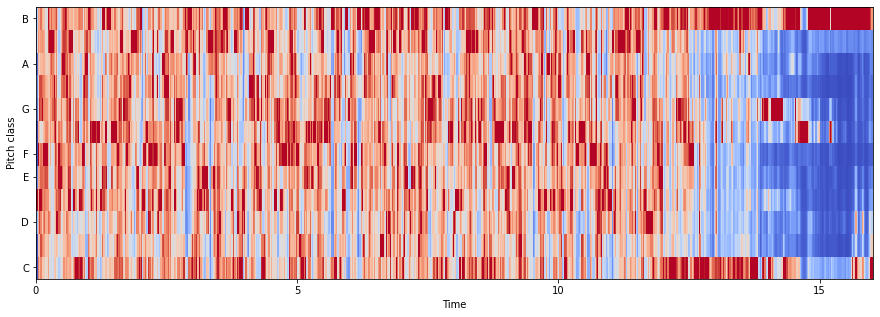

In [10]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y_h, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [11]:
chroma_1 = np.max(chromagram[0:2],axis=0)
chroma_2 = np.max(chromagram[2:4],axis=0)
chroma_3 = chromagram[4]
chroma_4 = np.max(chromagram[5:7],axis=0)
chroma_5 = np.max(chromagram[7:9],axis=0)
chroma_6 = np.max(chromagram[9:11],axis=0)
chroma_7 = chromagram[11]

chromagram_noshop = np.vstack((chroma_1, chroma_2, chroma_3, chroma_4, chroma_5, chroma_6, chroma_7))
chromagram_noshop.shape

#librosa.display.specshow(chromagram_noshop, y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

(7, 690)

<AxesSubplot:xlabel='Time'>

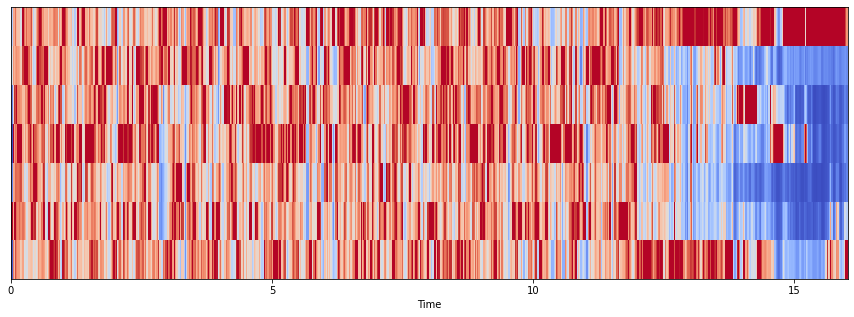

In [14]:
hop_length = 512
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram_noshop, x_axis='time', hop_length=hop_length, cmap='coolwarm')

In [17]:
# test
chromagram_bi = np.empty((chromagram_noshop.shape[0],chromagram_noshop.shape[1]),int)

for i in range(chromagram_noshop.shape[1]):
    chroma_max = np.max(chromagram_noshop[:,i])
    for j in range(7):
        if chroma_max == 0:
            chromagram_bi[j,i] = 0
        elif chromagram_noshop[j,i] == chroma_max:
            chromagram_bi[j,i] = 1
        else:
            chromagram_bi[j,i] = 0

<AxesSubplot:xlabel='Time'>

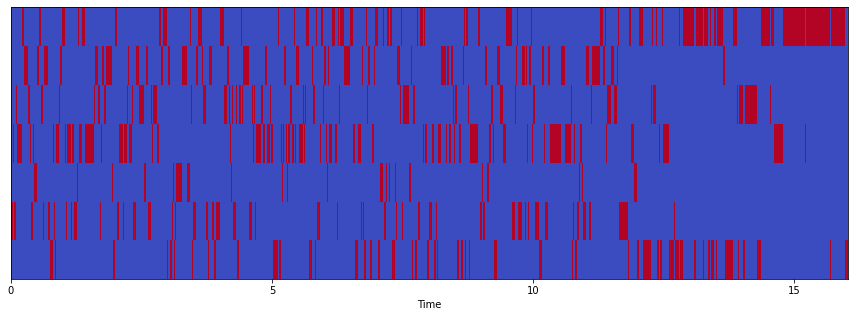

In [18]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram_bi, x_axis='time', hop_length=hop_length, cmap='coolwarm')

<AxesSubplot:xlabel='Time'>

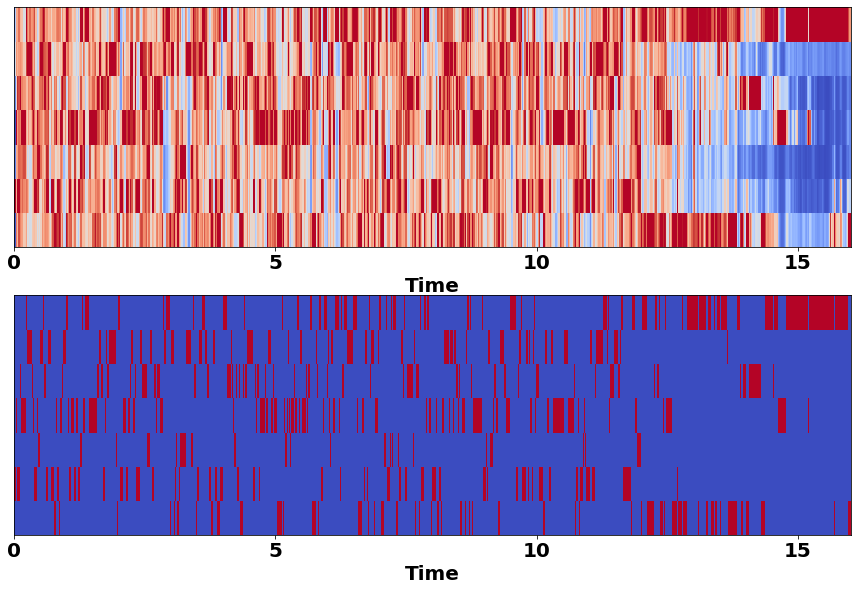

In [33]:
fig = plt.figure(figsize=(15, 15))
plt.rc('font', size = 20)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('axes', labelsize = 20)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


ax1 = fig.add_subplot(3, 1, 1)
librosa.display.specshow(chromagram_noshop, x_axis='time', hop_length=hop_length, cmap='coolwarm')

ax3 = fig.add_subplot(3, 1, 2)
librosa.display.specshow(chromagram_bi, x_axis='timedl enro', hop_length=hop_length, cmap='coolwarm')



In [258]:
chromagram_bi.shape

(7, 2584)

In [259]:
f = open('SOS_60_led_mean.txt', 'a')
for i in range(chromagram_bi.shape[0]):
    for j in range(chromagram_bi.shape[1]):
        f.write(str(chromagram_bi[i][j]))
f.close()